# Modeling a moving average process

## Defining a moving average process

#### A moving average process, or the moving average (MA) model, states that the current value is linearly dependent on the current and past error terms. The error terms are assumed to be mutually independent and normally distributed, just like white noise.

#### A moving average model is denoted as MA(q), where q is the order. The model expresses the present value as a linear combination of the mean of the series μ, the present error term ϵt, and past error terms ϵt–q. The magnitude of the impact of past errors on the present value is quantified using a coefficient denoted as θq. Mathematically, we express a general moving average process of order q as in equation 4.1.

- yt = μ + ϵt + θ1ϵt–1 + θ2ϵt–2 +⋅⋅⋅+ θqϵt–q



#### As usual, the first step is to gather the data. Then we test for stationarity. If our series is not stationary, we apply transformations, such as differencing, until the series is stationary. Then we plot the ACF and look for significant autocorrelation coefficients. In the case of a random walk, we will not see significant coefficients after lag 0. On the other hand, if we see significant coefficients, we must check whether they become abruptly non-significant after some lag q. If that is the case, then we know that we have a moving average process of order q. Otherwise, we must follow a different set of steps to discover the underlying process of our time series.

In [1]:
import pandas as pd
df = pd.read_csv("/Users/maukanmir/Documents/Machine-Learning/AI-ML-Textbooks/AI-ML-Learning/Data/widget_sales.csv")
df

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108
...,...
495,64.087371
496,63.992081
497,63.029894
498,61.671797


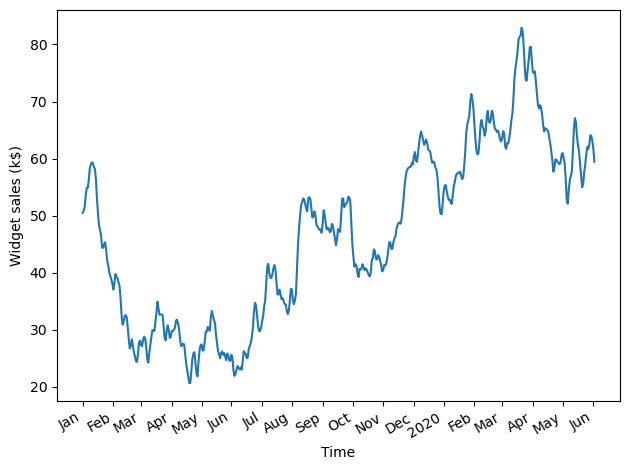

In [2]:
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots()
 
ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')
 
plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 
439, 468, 498], 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 
'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout() 

#### The next step is to test for stationarity. We intuitively know that the series is not stationary, since there is an observable trend in figure 4.4. Still, we will use the ADF test to make sure. Again, we’ll use the adfuller function from the statsmodels library and extract the ADF statistic and p-value. If the ADF statistic is a large negative number and the p-value is smaller than 0.05, our series is stationary. Otherwise, we must apply transformations.

In [3]:
from statsmodels.tsa.stattools import adfuller
 
ADF_result = adfuller(df['widget_sales'])
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5121662069359019
p-value: 0.5274845352272619


#### In order to make our series stationary, we will try to stabilize the trend by applying a first-order differencing. We can do so by using the diff method from the numpy library. Remember that this method takes in a parameter n that specifies the order of differencing. In this case, because it is a first-order differencing, n will be equal to 1.

In [4]:
import numpy as np

widget_sales_diff = np.diff(df['widget_sales'], n=1)  

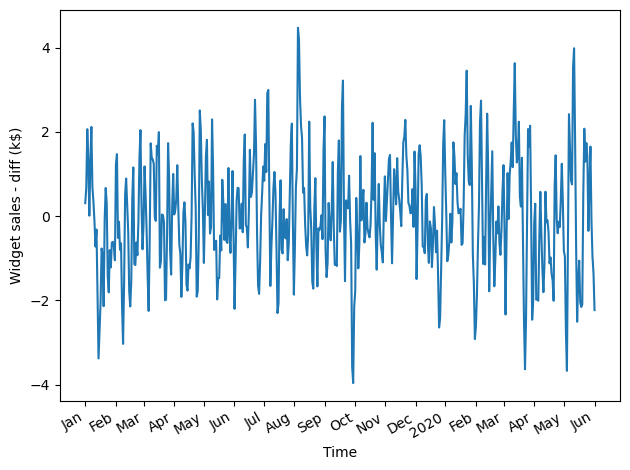

In [5]:
fig, ax = plt.subplots()

ax.plot(widget_sales_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

In [6]:
ADF_result = adfuller(widget_sales_diff)
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.576657780341964
p-value: 7.076922818586939e-19


#### This gives an ADF statistic of –10.6 and a p-value of 7 × 10–19. Therefore, with a large negative ADF statistic and a p-value much smaller than 0.05, we can say that our series is stationary.

#### Our next step is to plot the autocorrelation function. The statsmodels library conveniently includes the plot_acf function. We simply pass in our differenced series and specify the number of lags in the lags parameter. Remember that the number of lags determines the range of values on the x-axis.

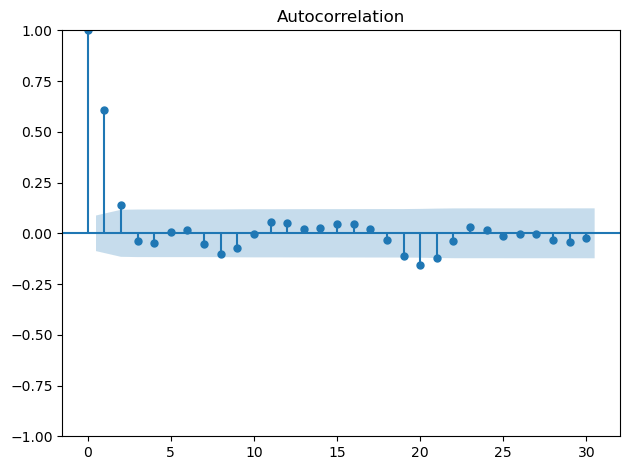

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
 
plot_acf(widget_sales_diff, lags=30)
 
plt.tight_layout()

- The values outside of the shaded area is the signal and will help us create a better model that fits the data
- The values in the shaded area can be categorized as noise and significant to the data

#### You can see how the ACF plot helps us determine the order of a moving average process. The ACF plot will show significant autocorrelation coefficients up until lag q, after which all coefficients will be non-significant. We can then conclude that we have a moving average process of order q, or an MA(q) process.